# Задача динамического рассеяния света (DLS)

В DLS, PSD можно перевернуть от нормализованного ACF электрического поля
$$
g(\tau) = \int_{0}^{\infty} G(\Gamma)\exp(-\Gamma\tau)d\Gamma    (1)
$$
в котором G-ширина линии распада, τ-время задержки, а $G(\Gamma)$- нормализованная функция распределения линии распада. $G(\Gamma)$ содержит информацию PSD и удовлетворяет условиям $\int_{0}^{\infty}G(\Gamma)d\Gamma = 1$. Согласно следующим трем формулам, PSD может быть решена из некорректного уравнения (1).

$$
\Gamma = Dq^2 
$$

$$
q = \frac{4\pi l}{\lambda}\sin(\frac{\theta}{2})
$$

$$
D = \frac{kbT}{3\pi\eta d}
$$

в котором q-рассеянный вектор, D-коэффициент диффузии, l-длина волны падающего света в вакуум, q-угол рассеяния, l-показатель преломления раствора, T-абсолютная температура, kb - постоянная Больцмана, d-диаметр частицы, а $\eta$ -вязкость раствора

Решение задачи динамического рассеяния света (DLS) позволяет определять размеры частиц в растворе по спектру интенсивности рассеяного света. Если растворе представлен один сорт частиц, то спектр итенсивности для нее определяется кривой Лоренца:
$$
I(f) = \frac{A}{\pi} \frac{\Gamma}{(2\pi f)^2 + \Gamma^2}
$$
Здесь $f$ - частота, $\Gamma$ - характеристика частицы, обратно пропорциональная ее диаметру.

Для раствора, содержащего $n$ частиц, спектр интенсивности есть сумма Лоренцов для каждой отдельной частицы, взятых с определенным весом, пропорциональным их концентрации:
$$
I(f) = \frac{1}{\pi} \sum_{i=1}^n\frac{A(\Gamma_i)\Gamma_i}{(2\pi f)^2 + \Gamma_i^2}
$$

В результате эксперимента методом DLS получается кривая интенсивности рассеяния, по которой необходимо определить частицы каких размеров представлены в растворе. Предполагая, что 

In [1]:

%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import sklearn.linear_model as sklm
import scipy
from numpy.fft import fft, fftfreq
import pywt

#fft Вычислить одномерное дискретное преобразование Фурье.
#fftreq Верните дискретные частоты выборки преобразования Фурье.
# основные константы. В этой части определяется все, что связано с постановкой эксперимента
kb = 1.38064e-23 # постоянная Больцмана
T = 273.15 + 24.85 # температура в K
theta = np.pi/2 # угол рассеяния
n = 1.3331 # показатель преломления
eta = 0.89e-3 # Н * с/м^2 - динамическая вязкость воды
l = 632.8e-9 # Длина волны лазера

# далее задаем коэффициент, связывающий характеричтику Gamma с размером частицы
coeff = (kb * T/(3 * np.pi * eta)) * (4 * np.pi * n / l)**2 * np.sin(theta/2)**2
d1 = 100e-9
G1 = coeff / d1 # Gamma для частицы размером 300 нм
d2 = 200e-9
G2 = coeff / d2

# определяем кривые Лоренца для частиц
w = np.arange(1,10001)
y1 = G1 / ((2 * np.pi * w)**2 + G1**2)
y2 = G2 / ((2 * np.pi * w)**2 + G2**2)
y = y1 + y2
#y = y1



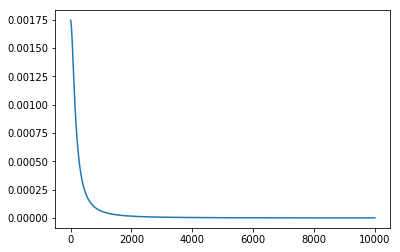

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

# кривая Лоренца
plt.plot(w, y)

# Преобразование Фурье получит Лоренц

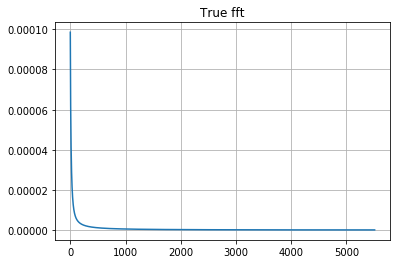

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

#fig = plt.figure(figsize=[14,4])
N = 10000           # Number of samplepoints
Fs = 11025.0
T = 1.0 / Fs      # N_samps*T (#samples x sample period) is the sample spacing.
#N_fft = 80        # Number of bins (chooses granularity)
x = np.linspace(0, N* T, N)     # the interval
y = y1 + y2   # the signal


# Compute the fft.
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
yf = scipy.fftpack.fft(y)


##### Plot the fft #####
plt.figure(1)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.title("True fft")
plt.show()
#plt.figure(2)
#plt.plot(x, y, label = " f(x)")
#plt.show()

In [4]:
# диапазон размеров частиц, где ищем нужный размер 
d_min = 1e-9 # 1 нм
d_max = 1e-6 

# задаем сетку по Gamma
G_min = coeff/d_max
G_max = coeff/d_min
N = 256*8 # Число узлов в сетке по \Gamma
M = w.size # Число точек по частоте
p = (G_max/G_min)**(1/(N-1))
G = np.zeros(N)

# неравнмерная сетка со сгущением к нулю (так как больщий вклад в интенсивность дают крупные частицы)
# хотя такая сетка - это не единственно возможный вариант
for j in range(N):
    G[j] = G_min * (p**j)

# вот равномерная сетка
#G = np.linspace(G_min, G_max, N)    

A = np.zeros((M,N))

# Матрица коэффициентов (составляется по базисным ф-ям)
for i in range(M):
    for j in range(N):
        A[i,j] = G[j] / ((2 * np.pi * w[i])**2 + G[j]**2)  

# Метод Cumulants




In [5]:
# g ˆ2 = B + beta*eˆ{-2*Gamma\ tau }*(1 + mu_2 /2! *tau ˆ2 - mu_3 /3! *tau ˆ3 ), B = 1
from scipy.optimize import curve_fit
def fitmodel_2nd_cumulant(x, B, beta, Gamma, mu_2):
    return B + beta * np.exp**(-2 *Gamma* x) + (1 + (mu_2/2 * t**2)**2)

(1.0, 1000.0)

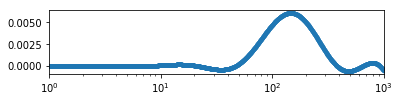

In [6]:
# Три метода решения переопределенной системы: Тихоновская регуляризация, неотрицательная Тихоновская регялризация и метод Лассо
# Ridge regression

clf = sklm.Ridge(alpha = 5e-7)
clf.fit(A, y)
a1 = clf.coef_

fig = plt.figure()
ax = plt.subplot(3,1,1)
line, = plt.plot(1e+9 * coeff/G, a1,'.-')
ax.set_xscale('log')
plt.xlim(d_min*1e9, d_max*1e9)
#scipy.stats.rv_continuous.fit// Maxcimum likelihood
#scipy.maxentropy 
#nnls 
#scipy.optimize.nnls
#plt.plot(freqs[mask], fft_theo[mask], label= "fft")
#scipy.stats.kstat -метод кумулянты

In [91]:
from pywt import wavedec
coeffs = wavedec(np.arange(1,2001, 0.1), 'db5', level=1)
cA1, cD1 = coeffs
print(cA1)

[2.23506161e+00 1.95440559e+00 1.66249392e+00 ... 2.82915972e+03
 2.82945164e+03 2.82970550e+03]
